# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> عملیات ریاضی (Arithmetic Operations) </div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
    عملیات ساده‌ای است که به ما این امکان را می‌دهد که به طور مستقیم شدت رنگ را اضافه یا کم کنیم.
    <br>
    عملیات بر روی خانه های نظیر به نظیر دو آرایه با ابعاد یکسان انجام شده و نتیجه نهایی کاهش یا افزایش روشنایی تصویر خواهد بود.
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> یادآوری</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
با توجه به اینکه برای تصاویر در OpenCV ار نوع داده‌ای uint8 یعنی عدد صحیح بدون علامت 8 بیتی استفاده میکنیم
    <br>
و یا توجه به 8 بیتی بودن، این نوع 2 به توان 8 یا 256 عدد مختلف را در خود می‌تواند جای دهد مقادیر خارج از 0 تا 255 امکان پذیر نبود و در صورتی که عددی بزرگتر قرار میدادیم متغیر سر ریز می‌شد...
</div>

In [8]:
import numpy as np

a = np.ones([2], dtype = "uint8")
print(a)
b = a * 100
print(b)
print(b + 155)
print(b + 160)

[1 1]
[100 100]
[255 255]
[4 4]


<div style="direction:rtl;text-align:right;font-family:Tahoma">
طبیعتا وقتی broadcast انجام نشود و ماتریس هم اندازه را نیز با هم جمع کنیم به نتایج مشابه می‌رسیم.
</div>

In [2]:
import numpy as np

m1 = np.array([[150, 155], [156, 157]], dtype = "uint8") 
m2 = np.ones([2,2], dtype = "uint8") * 100
print("m1:")
print(m1)
print("m2:")
print(m2)
print("m1+m2:")
print(m1 + m2)

m1:
[[150 155]
 [156 157]]
m2:
[[100 100]
 [100 100]]
m1+m2:
[[250 255]
 [  0   1]]


<div style="direction:rtl;text-align:right;font-family:Tahoma">
برای رفع این مشکل راه حل‌های مختلفی وجود داشت، از جمله ...</div>

In [3]:
m1 = np.array([[150, 155], [156, 157]], dtype = "uint8") 
m2 = np.ones([2,2], dtype = "uint8") * 100 #or you can simply write 100

modified_m1 = m1.astype('int16') + m2
modified_m1 = np.minimum(modified_m1, 255)
modified_m1 = modified_m1.astype('uint8')
modified_m1

array([[250, 255],
       [255, 255]], dtype=uint8)

In [4]:
import numpy as np

m1 = np.array([[150, 155], [156, 157]], dtype = "uint8") 

value_to_add = 100
max_threshold = 255 - 100

m1[m1 >= max_threshold] = 255
m1[m1 < max_threshold] += value_to_add

print(m1)

[[250 255]
 [255 255]]


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> عملیات ریاضی در OpenCV</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر از توابع 
    <b>cv2.add</b>
و 
    <b>cv2.subtract</b>
    استفاده کنیم این مشکل را مشاهده نخواهیم کرد و مقادیر کمتر از 0 همان 0 و مقادیر بیش از 255 همان 255 باقی خواهد ماند.
</div>


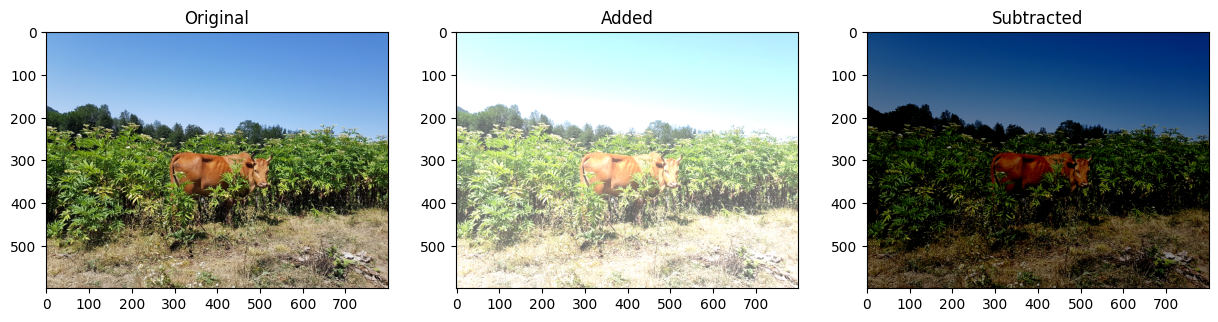

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('input.jpg')

# Create a matrix of ones, then multiply it by a scaler of 100 
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 100

added = cv2.add(image, M)
subtracted = cv2.subtract(image, M)


plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(added[...,::-1]);plt.title("Added");
plt.subplot(133);plt.imshow(subtracted[...,::-1]);plt.title("Subtracted");


cv2.imshow("Original", image)
cv2.imshow("Added", added)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> مثال عملی ترکیب تصاویر رنگی   </div>

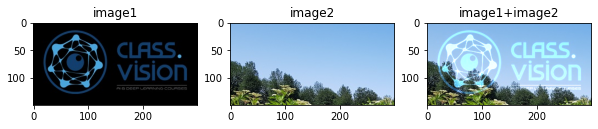

In [6]:
import cv2
import numpy as np

img1 = cv2.imread('./class.vision.jpg')
h,w,channel = img1.shape
img2 = cv2.imread('./input.jpg')[100:100+h, 100:100+w,:]

output_image = cv2.add(img1,img2)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(img1[...,::-1]);plt.title("image1");
plt.subplot(132);plt.imshow(img2[...,::-1]);plt.title("image2");
plt.subplot(133);plt.imshow(output_image[...,::-1]);plt.title("image1+image2");


In [7]:
import cv2
import numpy as np

img1 = cv2.imread('./input.jpg')
img2 = cv2.imread('./class.vision.jpg')

print(img1.shape)
print(img2.shape)

(600, 800, 3)
(150, 300, 3)


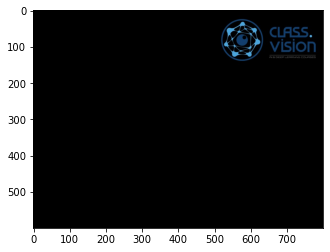

In [8]:
logo_h, logo_w, channels = img2.shape
location_h = 10
location_w = 500
padded_img2 = np.zeros_like(img1)
padded_img2[location_h:location_h+logo_h,location_w:location_w+logo_w,:] = img2
plt.imshow(padded_img2[...,::-1])


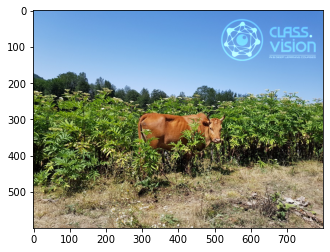

In [9]:
output_image = cv2.add(img1,padded_img2)
plt.imshow(output_image[...,::-1])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> ترکیب دو تصویر با جمع وزن‌دار    </div>
**addWeighted(src1, alpha, src2, beta, gamma)**
<br>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
آلفا و بتا در فرمول دوم مشاهده میشود.
</div>
<br>
g(x)=(1−α)f0(x)+αf1(x)
<br>
dst=α⋅img1+β⋅img2+γ

<br>
https://docs.opencv.org/3.2.0/d0/d86/tutorial_py_image_arithmetics.html

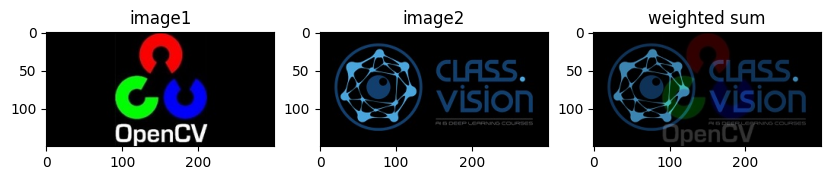

In [21]:
img1 = cv2.imread('./opencv.jpg')
img2 = cv2.imread('./class.vision.jpg')

output_image = cv2.addWeighted(img1,0.2,img2,0.8,0)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(img1[...,::-1]);plt.title("image1");
plt.subplot(132);plt.imshow(img2[...,::-1]);plt.title("image2");
plt.subplot(133);plt.imshow(output_image[...,::-1]);plt.title("weighted sum");

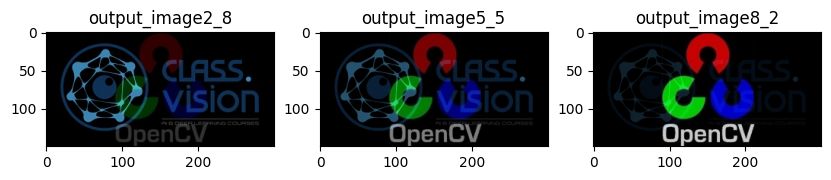

In [15]:
output_image2_8 = cv2.addWeighted(img1,0.2,img2,0.8,0)
output_image5_5 = cv2.addWeighted(img1,0.5,img2,0.5,0)
output_image8_2 = cv2.addWeighted(img1,0.8,img2,0.2,0)

plt.figure(figsize=[10,5])
plt.subplot(131);plt.imshow(output_image2_8[...,::-1]);plt.title("output_image2_8");
plt.subplot(132);plt.imshow(output_image5_5[...,::-1]);plt.title("output_image5_5");
plt.subplot(133);plt.imshow(output_image8_2[...,::-1]);plt.title("output_image8_2");